In [1]:
from MES_LSTM.model import *
from utils.metrics import *

import warnings
warnings.simplefilter('ignore')

# check version
print(tf.keras.__version__)
print(tf.__version__)
print(tfp.__version__)
print(tf.config.list_physical_devices('GPU'))



2.4.0
2.4.1
0.12.2
[]


2021-09-17 10:24:06.247750: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [2]:
pre_layer = preprocess(first_time = 0, loc = 'Seychelles', thresh = 0.45) # change first time to 1 if first time running to download data
df = pre_layer.load_data()
df = pre_layer.clean_data(df)
df = pre_layer.fill_missing(df)
scaled_df, df_scaler = pre_layer.scale(df)
scaled_df

[INFO] data cleaned
[INFO] the dataframe has 28 columns in total and 15 columns that have missing values.
                         Missing Values  % of Total Values
icu_patients                        549              100.0
hosp_patients                       549              100.0
weekly_icu_admissions               549              100.0
weekly_hosp_admissions              549              100.0
total_tests                         549              100.0
positive_rate                       549              100.0
total_boosters                      549              100.0
handwashing_facilities              549              100.0
excess_mortality                    533               97.1
people_fully_vaccinated             498               90.7
total_vaccinations                  483               88.0
people_vaccinated                   483               88.0
total_deaths                        296               53.9
reproduction_rate                   120               21.9
stringenc

,total_cases,total_deaths,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-03-15,1.000000,1.000000,1.119321,1.026290,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-16,1.000097,1.000171,1.177291,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-17,1.000097,1.000171,1.177291,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-18,1.000194,1.000256,1.177361,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-03-19,1.000194,1.000256,1.177361,1.157880,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,2.000000,2.000000,1.812030,1.938529,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-11,2.000000,2.000000,1.804511,1.933853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-12,2.000000,2.000000,1.804511,1.933853,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-13,2.000000,2.000000,1.502078,1.742932,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
mes_layer = ES(loc = 'Seychelles')
params, internals = mes_layer.es(scaled_df)
es_scaled, df_trend, df_seas = mes_layer.deTS(scaled_df, internals)

es_scaled

[INFO] internals loaded


,total_cases,total_deaths,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
2020-03-15,4.328644e-07,-1.928874e-12,-8.709700e-14,-3.537726e-13,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10,6.908253e-10
2020-03-16,2.169663e-06,1.495973e-11,1.804235e-11,5.390812e-10,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09,1.378185e-09
2020-03-17,-2.000152e-06,-5.387357e-12,-5.931478e-12,-1.396350e-11,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09,2.062108e-09
2020-03-18,-2.340678e-06,1.102995e-11,-6.316225e-12,-3.595585e-11,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09,2.742610e-09
2020-03-19,-1.159285e-06,-3.031675e-11,-5.075829e-12,-9.436896e-13,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09,3.419708e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-10,-3.503966e-05,-5.667503e-11,-5.011602e-12,-1.803518e-11,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07,1.260335e-07
2021-09-11,-2.607965e-05,-6.009462e-11,-4.586387e-12,-2.898842e-11,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07,1.260679e-07
2021-09-12,-1.959639e-05,-7.797216e-11,-1.769807e-12,-5.959344e-12,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07,1.261020e-07
2021-09-13,-1.229395e-05,-5.275602e-11,-1.011465e-10,-7.030649e-10,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07,1.261358e-07


[INFO] data shape: train = (495, 16), valid = (13, 16), test = (41, 16), x_train = (495, 14), y_train = (495, 2), x_valid = (13, 14), y_valid = (13, 2), x_test = (41, 14)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               99000     
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 99,302
Trainable params: 99,302
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15


2021-09-17 10:24:22.184550: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-17 10:24:22.184883: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-17 10:24:22.307817: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-17 10:24:22.308309: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2600230000 Hz


16/16 [==============================] - 3s 82ms/step - loss: 1.7023e-07 - val_loss: 5.6113e-08
Epoch 2/15
16/16 [==============================] - 0s 22ms/step - loss: 2.0878e-08 - val_loss: 1.0191e-07
Epoch 3/15
16/16 [==============================] - 0s 28ms/step - loss: 4.9237e-09 - val_loss: 1.1618e-07
Epoch 4/15
16/16 [==============================] - 0s 27ms/step - loss: 9.1606e-10 - val_loss: 1.2740e-07
Epoch 5/15
16/16 [==============================] - 0s 21ms/step - loss: 1.2932e-09 - val_loss: 1.1410e-07
Epoch 6/15
16/16 [==============================] - 0s 22ms/step - loss: 5.7513e-10 - val_loss: 1.0855e-07
Epoch 7/15
16/16 [==============================] - 0s 25ms/step - loss: 4.6830e-10 - val_loss: 1.4892e-07
Epoch 8/15
16/16 [==============================] - 0s 25ms/step - loss: 2.5244e-09 - val_loss: 1.0172e-07
Epoch 9/15
16/16 [==============================] - 0s 23ms/step - loss: 2.0744e-09 - val_loss: 8.4975e-08
Epoch 10/15
16/16 [=============================

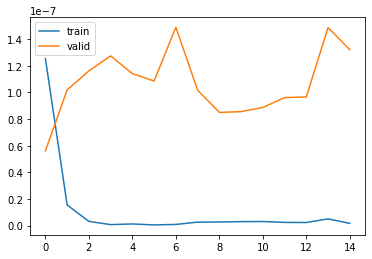

In [4]:
dl_layer = lstm(loc = 'Seychelles')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(es_scaled)
y_pred_es_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] forecasts saved in results folder


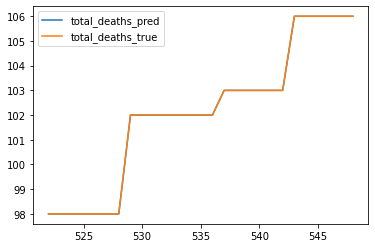

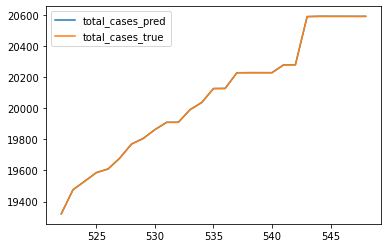

In [5]:
forecasts = dl_layer.reTS(y_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

### prediction intervals

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 2)                 602       
Total params: 99,602
Trainable params: 99,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 3s 58ms/step - loss: 758.9778 - val_loss: 755.2516
Epoch 2/15
16/16 [==============================] - 0s 20ms/step - loss: 754.0628 - val_loss: 750.3349
Epoch 3/15
16/16 [==============================] - 0s 20ms/step - loss: 749.1463 - val_loss: 745.4827
Epoch 4/15
16/16 [==============================] - 0s 23ms/step - loss: 744.3144 - val_loss: 740.6806
Epoch 5/15
16/16 [==============================] - 0s 23ms/step - loss: 739.5130 - val_loss: 7

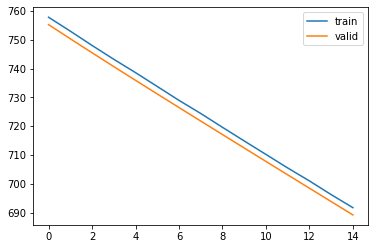

[INFO] prediction intervals computed


In [6]:
pi_pred_es_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

[INFO] prediction intervals saved in results folder


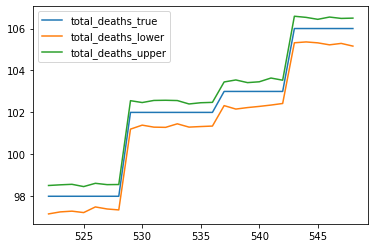

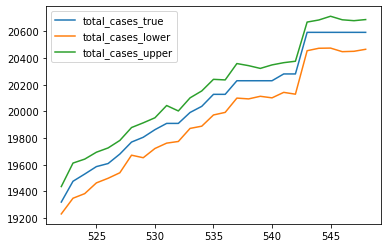

In [7]:
pi = dl_layer.reTS_pi(pi_pred_es_scaled, es_scaled, train, valid, df_trend, df_seas, df_scaler, df)

In [8]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

1.2161761988465827
238.33903286845586


In [9]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

100.0
100.0


In [10]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.0023561332984626832
0.004126325978735885


In [11]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

0.0024031344940530354
0.8997957310149107


# RNN

[INFO] data shape: train = (495, 16), valid = (13, 16), test = (41, 16), x_train = (495, 14), y_train = (495, 2), x_valid = (13, 14), y_valid = (13, 2), x_test = (41, 14)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 302       
Total params: 99,302
Trainable params: 99,302
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 2s 49ms/step - loss: 0.5231 - val_loss: 1.2400
Epoch 2/15
16/16 [==============================] - 0s 23ms/step - loss: 0.0308 - val_loss: 0.7383
Epoch 3/15
16/16 [==============================] - 0s 22ms/step - loss: 0.0818 - val_loss: 0.9427
Epoch 4/15
16/16 [=====================

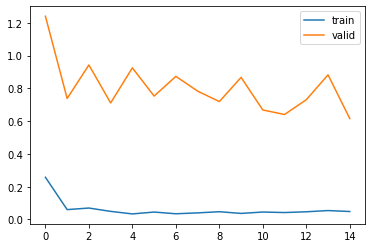

[INFO] forecasts saved in results folder


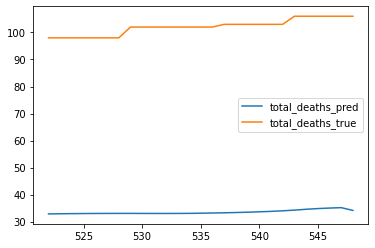

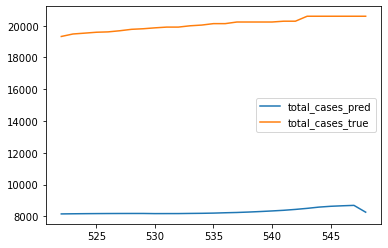

In [12]:
dl_layer = lstm(results_path = 'results/pure_lstm/', loc = 'Seychelles')
train, valid, test, x_train, y_train, x_valid, y_valid, x_test = dl_layer.split(scaled_df)
y_pred_scaled = dl_layer.forecast_model(test, x_train, y_train, x_valid, y_valid, x_test)

forecasts = dl_layer.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)

### prediction intervals

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               99000     
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 2)                 602       
Total params: 99,602
Trainable params: 99,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
16/16 [==============================] - 3s 63ms/step - loss: 761.6596 - val_loss: 758.3415
Epoch 2/15
16/16 [==============================] - 0s 23ms/step - loss: 756.0718 - val_loss: 753.2278
Epoch 3/15
16/16 [==============================] - 0s 23ms/step - loss: 751.0667 - val_loss: 748.3745
Epoch 4/15
16/16 [==============================] - 0s 22ms/step - loss: 746.2747 - val_loss: 743.7541
Epoch 5/15
16/16 [==============================] - 0s 26ms/step - loss: 741.5243 - val_loss: 7

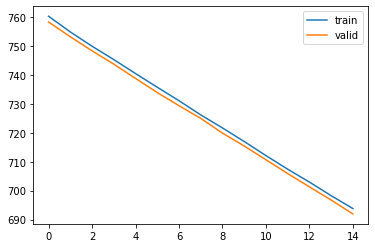

[INFO] prediction intervals computed
[INFO] prediction intervals saved in results folder


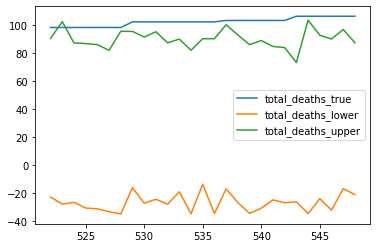

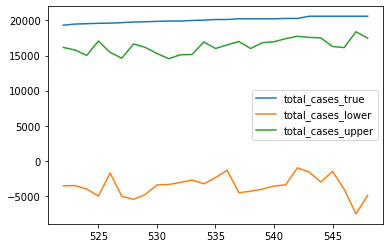

In [13]:
pi_pred_scaled = dl_layer.pi_model(test, x_train, y_train, x_valid, y_valid, x_test)

pi = dl_layer.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [14]:
pi.head()

,total_deaths_true,total_deaths_lower,total_cases_lower,total_cases_true,total_deaths_upper,total_cases_upper
522,98.0,-22.677223,-3552.621875,19320.0,90.141485,16155.128946
523,98.0,-27.718398,-3528.292543,19476.0,102.182794,15788.560761
524,98.0,-26.430367,-4015.547195,19530.0,87.022040,15019.480248
525,98.0,-30.511866,-5017.392792,19586.0,86.553267,17060.540593
526,98.0,-31.091279,-1740.110241,19609.0,85.773143,15444.967578


In [15]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

363.7674173810239
94073.19384344935


In [16]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

3.7037037037037033
0.0


In [17]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

101.12383997945643
82.99788978881594


In [18]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

68.6031429340965
11773.024345618618


# VARMAX

[INFO] data shape: train = (495, 16), test = (54, 16), x_train = (495, 14), y_train = (495, 2), x_test = (54, 14)
[INFO] VARMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


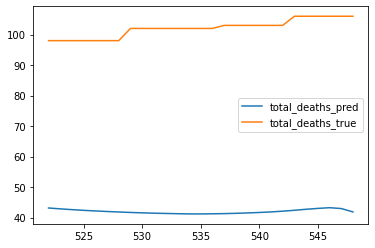

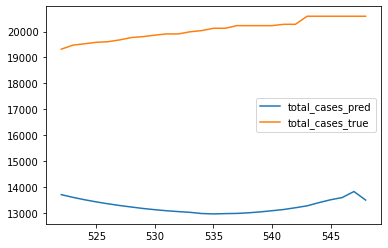

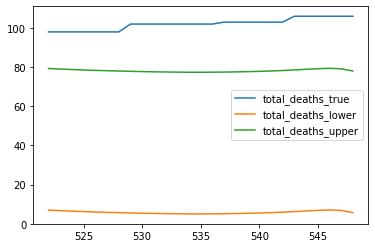

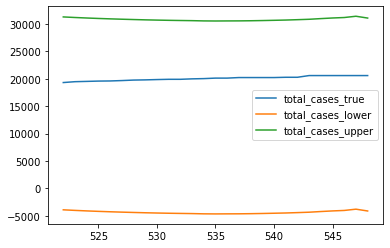

In [19]:
bench = stats(loc = 'Seychelles')
train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_varmax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [20]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

550.5214237672369
35189.77035803595


In [21]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
100.0


In [22]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

83.39381323584527
40.90664235595173


In [23]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

60.161485075765725
6831.085125429433


# SARIMAX

[INFO] SARIMAX fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


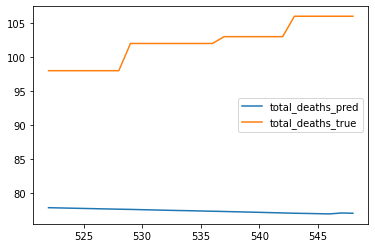

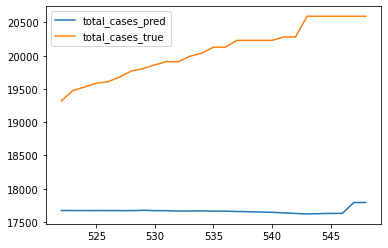

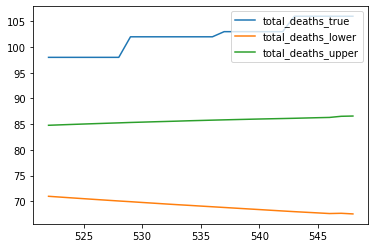

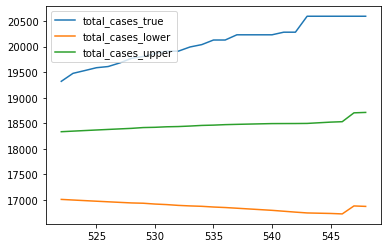

In [24]:
bench = stats(results_path = 'results/sarimax/', loc = 'Seychelles')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_sarimax(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [25]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

344.41431986756214
33648.24066690416


In [26]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [27]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

27.462192639900163
12.702464637541745


In [28]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

24.873053380006997
2430.269428841253


# MLR

[INFO] MLR fitting complete
[INFO] forecasts saved in results folder
[INFO] prediction intervals saved in results folder


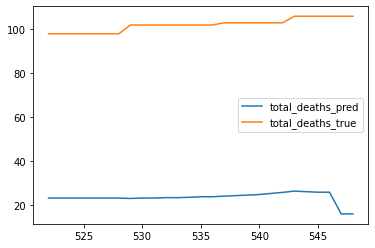

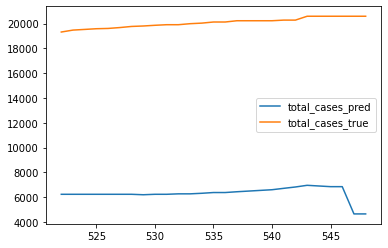

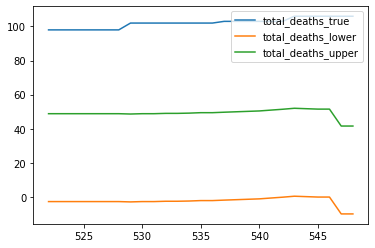

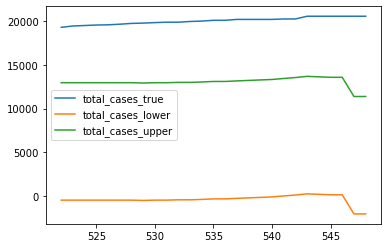

In [29]:
bench = stats(results_path = 'results/mlr/', loc = 'Seychelles')
# train, test, x_train, x_test = bench.split(scaled_df)
y_pred_scaled, pi_pred_scaled = bench.forecast_mlr(test, x_train, y_train, x_test)
forecasts = bench.descale(y_pred_scaled, scaled_df, train, valid, df_scaler, df)
pi = bench.descale_pi(pi_pred_scaled, scaled_df, train, valid, df_scaler, df)

In [30]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(mis(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values, alpha = dl_layer.alpha))
print(mis(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values, alpha = dl_layer.alpha))

1110.1805983017096
153912.22334086956


In [31]:
# print('\n' + 'MIS for MES-RNN:\n', file = f)
print(coverage(pi['total_deaths_lower'].values, pi['total_deaths_upper'].values, pi['total_deaths_true'].values))
print(coverage(pi['total_cases_lower'].values, pi['total_cases_upper'].values, pi['total_cases_true'].values))

0.0
0.0


In [32]:
print(smape(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(smape(forecasts['total_cases_true'], forecasts['total_cases_pred']))

125.58155871110378
104.46359849084565


In [33]:
print(rmse(forecasts['total_deaths_true'], forecasts['total_deaths_pred']))
print(rmse(forecasts['total_cases_true'], forecasts['total_cases_pred']))

78.80104853647441
13775.536653304009
